### Dataset: Employee Future Prediction
[Dataset en Kaggle](https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction)

In [1]:
# importaciones
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# leyendo el dataset
empleados = pd.read_csv('../data/Employee.csv')

# chequeando que estén todos los datos
empleados.shape

(4653, 9)

In [3]:
# Chequeando por duplicados
duplicados = empleados.duplicated().sum()
duplicados

1889

In [4]:
# Eliminando duplicados
empleados = empleados.drop_duplicates()
empleados.shape

(2764, 9)

# 010 - Relación entre educación (Education) y categoría de pago (PaymentTier)
> Con este análisis, buscamos investigar si hay alguna relación entre el tipo de educación de un empleado con la categoría de pago en la que se encuentra.
>
> **Hipótesis**: Mayor educación → Categoría de pago más alta.


<table align='center'>
<tr>
<th> Educación </th>
<th> Categoría de pago </th>
</tr>
<tr>
<td>

- PhD = 1
- Masters = 2
- Bachelors = 3

PhD > Masters > Bachelors


</td>
<td>

- 1 (Categoría más alta)
- 2 
- 3 (Categoría más baja)

</td>
</tr>
</table>




 


### Exploración inicial

In [186]:
# Muestra del dataset
empleados.sample(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
2214,Bachelors,2012,Bangalore,3,30,Female,No,1,1
4373,Bachelors,2013,Bangalore,3,30,Female,No,4,0
1783,Bachelors,2013,Pune,3,28,Male,No,0,0
2163,Bachelors,2014,Bangalore,3,27,Male,No,5,1
4353,Bachelors,2014,Bangalore,3,27,Male,No,5,0
1093,Masters,2017,Bangalore,3,26,Female,No,4,0
3222,Bachelors,2013,Bangalore,3,33,Male,No,3,0
2013,Masters,2015,New Delhi,3,28,Female,No,2,0
367,Masters,2015,Pune,2,25,Female,No,3,1
973,Bachelors,2013,Pune,2,24,Female,No,2,1


In [8]:
# Tipos de Educación
empleados['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [9]:
# Tipos de categoría de pago
empleados['PaymentTier'].unique()

array([3, 1, 2], dtype=int64)

In [7]:
# Cambiamos los tipos de educación por números para poder aplicar la función de correlación
# Los nuevos datos se agregan en una columna llamada EduNum

edu_num = {'Bachelors':3,
            'Masters':2,
            'PHD': 1}

empleados.loc[:,'EduNum'] = empleados['Education'].map(edu_num) 
empleados

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,EduNum
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,3
1,Bachelors,2013,Pune,1,28,Female,No,3,1,3
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,3
3,Masters,2016,Bangalore,3,27,Male,No,5,1,2
4,Masters,2017,Pune,3,24,Male,Yes,2,1,2
...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0,2
4647,Bachelors,2016,Pune,3,30,Male,No,2,0,3
4649,Masters,2013,Pune,2,37,Male,No,2,1,2
4650,Masters,2018,New Delhi,3,27,Male,No,5,1,2


### Análisis de correlación

In [13]:
# Seleccionamos las comunas con datos numéricos
empleados_num = empleados.select_dtypes(np.number)

corr_matrix = empleados_num.corr()

# Resaltamos la columna que nos interesa (Tipo de educación)
corr_matrix.style.apply(lambda x: ['background: mediumslateblue' if x.name == 'EduNum'  else '' for i in x], axis=0)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,EduNum
JoiningYear,1.000000,-0.053823,0.024445,-0.031228,0.150650,-0.113858
PaymentTier,-0.053823,1.000000,0.067514,-0.004602,-0.119891,0.071380
Age,0.024445,0.067514,1.000000,-0.053276,-0.114943,0.107324
ExperienceInCurrentDomain,-0.031228,-0.004602,-0.053276,1.000000,-0.021181,-0.043842
LeaveOrNot,0.150650,-0.119891,-0.114943,-0.021181,1.000000,-0.019661
EduNum,-0.113858,0.071380,0.107324,-0.043842,-0.019661,1.000000


In [12]:
# Correlación solo del tipo de educación con la categoría de pago
empleados[['EduNum', 'PaymentTier']].corr()


,EduNum,PaymentTier
EduNum,1.00000,0.07138
PaymentTier,0.07138,1.00000


**No se observa correlación.**

En la primer tabla podemos ver que el tipo de educación (EduNum) tiene correlación baja con la edad y correlación negativa baja con el año de ingreso, mientras que la categoría de pago tiene correlación negativa baja con LeaveOrNot.
Pero no existe correlación entre ellos.

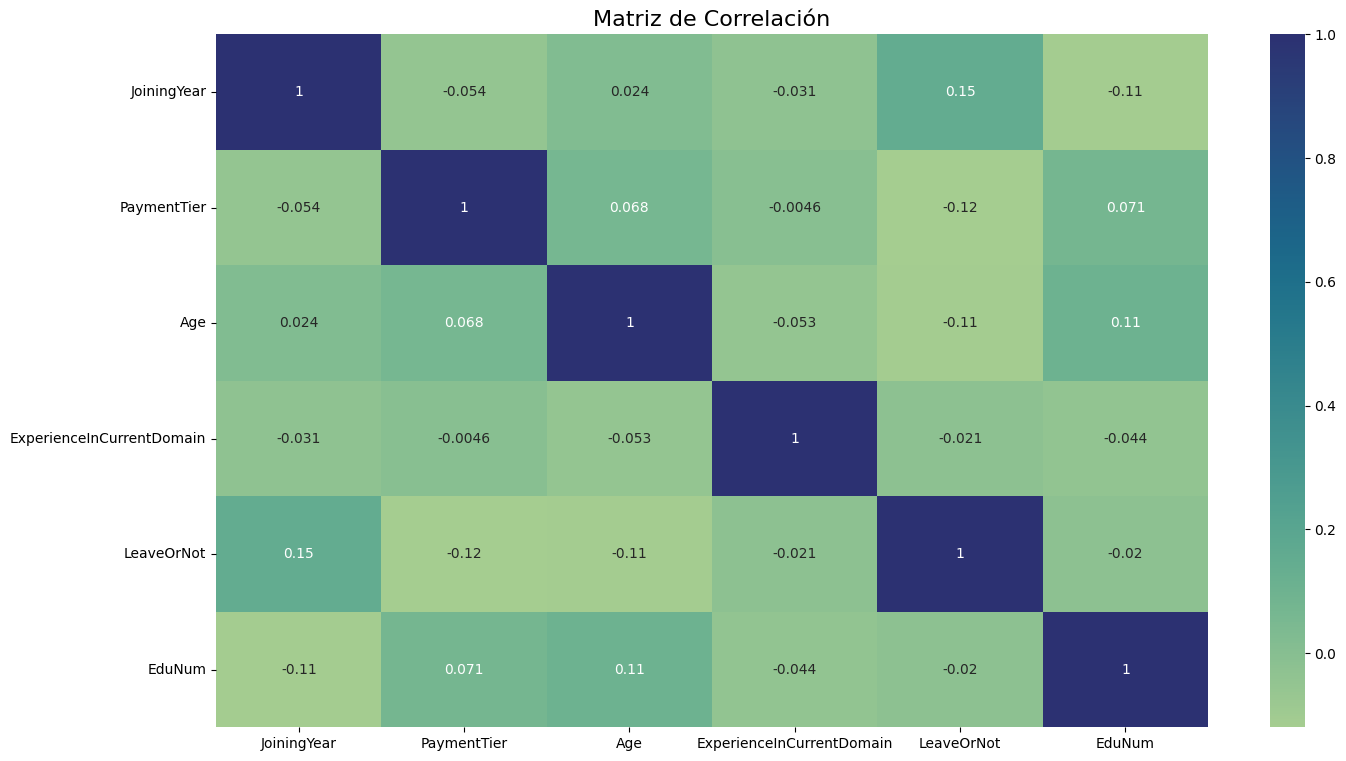

In [19]:
# Gráfico de Matriz de correlación
plt.figure(figsize=(16,9))
sns.heatmap(empleados_num.corr(),annot= True,cmap = 'crest')
plt.title('Matriz de Correlación', fontsize=16)

plt.show()

### Análisis comparativo entre Education y PaymentTier

In [17]:
# Cantidad de empleados por cada tipo de educación
bachelors = len(empleados[(empleados['Education']=='Bachelors')])
masters = len(empleados[(empleados['Education']=='Masters')])
phd = len(empleados[(empleados['Education']=='PHD')])

print(f'CANTIDAD DE EMPLEADOS POR TIPO DE EDUCACIÓN\nBachelors: {bachelors}\nMasters: {masters}\nPHD: {phd}')

CANTIDAD DE EMPLEADOS POR TIPO DE EDUCACIÓN
Bachelors: 1971
Masters: 637
PHD: 156


In [18]:
# Cantidad de empleados por cada categoría de pago
cat1 = len(empleados[(empleados['PaymentTier']==1)])
cat2 = len(empleados[(empleados['PaymentTier']==2)])
cat3 = len(empleados[(empleados['PaymentTier']==3)])

print(f'CANTIDAD DE EMPLEADOS POR CATEGORÍA DE PAGO\nCategoría 1: {cat1}\nCategoría 2: {cat2}\nCategoría 3: {cat3}')

CANTIDAD DE EMPLEADOS POR CATEGORÍA DE PAGO
Categoría 1: 218
Categoría 2: 570
Categoría 3: 1976


In [148]:
# Agrupamos por tipo de educación y por categoría de pago
df = empleados.groupby(['Education', 'PaymentTier']).size().to_frame('EmployeeCount').reset_index()
education_count = df.groupby('Education')['EmployeeCount'].sum()

# Sacamos el porcentaje de cada subgrupo
df['Percentage'] = df.apply(lambda x: f'{(x["EmployeeCount"] / education_count[x["Education"]]) * 100:.2f}%', axis=1)

df.style.hide(axis='index')

Education,PaymentTier,EmployeeCount,Percentage
Bachelors,1,150,7.61%
Bachelors,2,336,17.05%
Bachelors,3,1485,75.34%
Masters,1,54,8.48%
Masters,2,215,33.75%
Masters,3,368,57.77%
PHD,1,14,8.97%
PHD,2,19,12.18%
PHD,3,123,78.85%


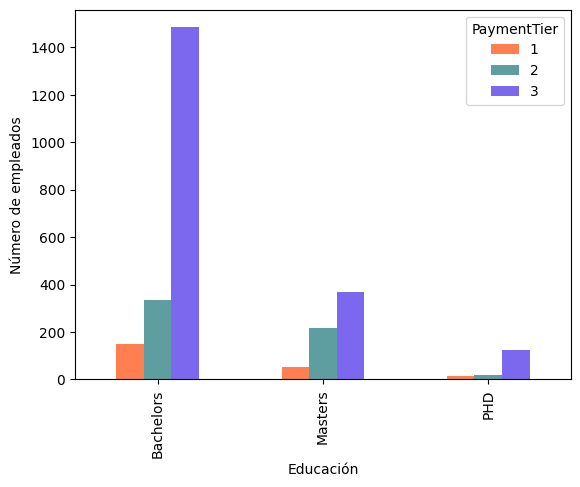

In [164]:
# Gráfico de barras para visualizar la distribución de "categoría de pago" por cada tipo de educación
colors = ['coral', 'cadetblue', 'mediumslateblue']

graf1 = empleados.groupby(['Education', 'PaymentTier']).size().unstack()
graf1.plot(kind='bar', color=colors)

plt.xlabel('Educación')
plt.ylabel('Número de empleados')
plt.show()

* Para los empleados con título de licenciatura (Bachelors), la mayoría se encuentra en la categoría 3, la más baja. Y menos del 25% se divide en las otras dos categorías.
* En el caso de los empleados con masters, las categorías se encuentran un poco más distribuídas. Un 57.77% en la categoría 3 y un 33% en la categoría 2.
* Para los empleados con doctorado (PHD) ocurre algo similar que en Bachelors.

### Conclusión
---

> Luego de este análisis, podemos concluir que la hipótesis planteada, de que un mayor nivel de educación genere una categoría de pago mejor, no se cumple. 
> Como pudimos observar la mayoría de los empleados se encuentran en la categoría de pago más baja, independientemente del nivel de educación.

*Nota: Hay que tener en cuenta que la cantidad de empleados por cada nivel de educación es muy dispar lo que puede influir en los resultados  finales.